# Project 1 (Write a Data Science Blog Post)

## Stack Ocerflow Survey Data Analysis
I am using the Stack Overflow Developer Survey, 2017 Data. In this project we will ask some questions to
extract insightful results. I wanted to get insights about the people who are actually Professional developer. 
That is why I filtered the data with respect to that. 


## Questions

1 - What is the distribution of the Job Satisfaction over the countries?

2 - Salary changes of the develoeps by country.

3 - Diversity of the education by country

### Data Preperation

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv('survey_results_public.csv')

In [55]:
pd.set_option('max_columns', None)

In [56]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [57]:
# Filtering the Proffesional develoeprs only
developers = df[df['Professional'] == "Professional developer"]

# Not all of the job satisfaction coulumn is full. Lets fill N/A data with the mean.
developers["JobSatisfaction"] = developers.groupby(["Country"])["JobSatisfaction"]\
.transform(lambda x: x.fillna(x.mean()))
## rounding the numbers because the numbers on scale was integer.
developers.JobSatisfaction = developers.JobSatisfaction.round()

developers["Salary"] = developers.groupby(["Country"])["Salary"]\
.transform(lambda x: x.fillna(x.mean()))


developers["FormalEducation"] = developers.groupby(["Country"])["FormalEducation"]\
.transform(lambda x: x.fillna(x.mode()))

developers["MajorUndergrad"] = developers.groupby(["Country"])["MajorUndergrad"]\
.transform(lambda x: x.fillna(x.mode()))


# I used mode mean and the lambda functions taht we learned at the class.

<ipython-input-57-c8bb61378bb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developers["JobSatisfaction"] = developers.groupby(["Country"])["JobSatisfaction"]\
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-57-c8bb61378bb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

##### 1 - Country breakdown for Job Satisfaction

In [68]:
top_50_country = list(developers['Country'].value_counts().head(50).index)

filtered_developers = developers[developers['Country'].isin(top_50_country)]

aggregated_data = filtered_developers.groupby(['Country','JobSatisfaction'], as_index=False)['Respondent'].count()

total_respondents_per_country = filtered_developers['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

# Pivot the data
aggregated_data = aggregated_data[['Country', 'JobSatisfaction', 'Respondent Percentage']]
aggregated_data
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSatisfaction')
pivoted_data = pivoted_data.fillna(0)

pivoted_data = pivoted_data.reindex(pivoted_data.sort_values(by=10.0, ascending=False).index)
pivoted_data

JobSatisfaction,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Country,,,,,,,,,,,
Israel,0.009,0.002,0.009,0.015,0.015,0.059,0.092,0.172,0.298,0.148,0.181
Mexico,0.000,0.004,0.027,0.015,0.050,0.069,0.089,0.201,0.236,0.151,0.158
Colombia,0.008,0.000,0.008,0.049,0.025,0.033,0.148,0.279,0.164,0.139,0.148
Austria,0.003,0.024,0.015,0.048,0.024,0.078,0.081,0.180,0.260,0.141,0.147
Lithuania,0.000,0.000,0.017,0.000,0.033,0.075,0.100,0.225,0.250,0.158,0.142
Nigeria,0.019,0.010,0.057,0.086,0.105,0.095,0.152,0.162,0.114,0.067,0.133
Hungary,0.009,0.009,0.021,0.051,0.056,0.060,0.107,0.214,0.201,0.141,0.132
Denmark,0.000,0.004,0.031,0.013,0.004,0.045,0.099,0.193,0.305,0.175,0.130
Serbia,0.011,0.000,0.006,0.034,0.011,0.112,0.112,0.185,0.236,0.163,0.129


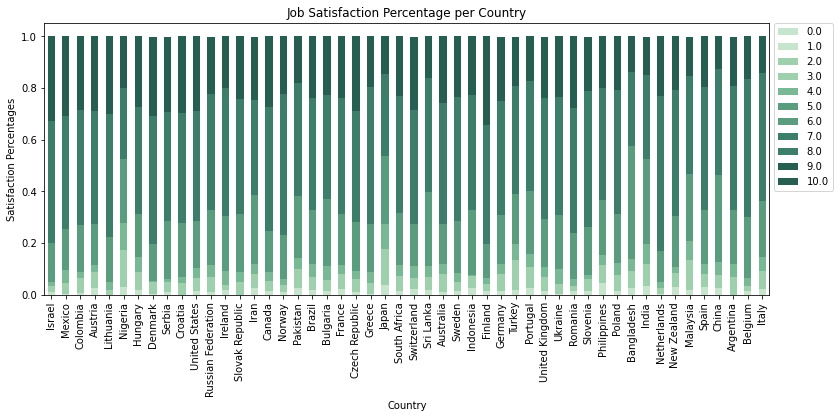

In [18]:

# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage per Country')
plt.show()

This data shows us that the Isreal has the best ratio with highest point.%18 of the develoeprs libing in Israel gave 10 about tehir Job Satisfaction. In addition to that some other thing taht we need to consider. % over the top 10 countries are develeping or underdevelop countries. This is meaningful because developer jobs broughts more income to the citizens of the developing countries than almost any other job. I am lving in a developing country as well. This is why this makes sense.

In [132]:
top_50_country = list(developers['Country'].value_counts().head(50).index)

filtered_developers = developers[developers['Country'].isin(top_50_country)]

aggregated_data = filtered_developers.groupby(['Country'])['Salary'].sum().reset_index(name = 'TotalSalary')


total_respondents_per_country = filtered_developers['Country'].value_counts()

aggregated_data['SalaryPerPerson'] = aggregated_data \
                                           .apply(lambda x: x['TotalSalary'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)
aggregated_data = aggregated_data.sort_values(by=['SalaryPerPerson'], ascending=True)
aggregated_data



,Country,TotalSalary,SalaryPerPerson
30,Nigeria,8.590314e+05,8181.252
32,Pakistan,2.515942e+06,8195.250
19,Indonesia,1.350549e+06,8713.222
18,India,3.547624e+07,10318.861
20,Iran,3.310894e+06,10544.248
33,Philippines,2.441307e+06,12584.055
26,Malaysia,1.589644e+06,14321.114
9,Colombia,1.881559e+06,15422.617
27,Mexico,4.276400e+06,16511.198
43,Sri Lanka,2.025866e+06,17024.088


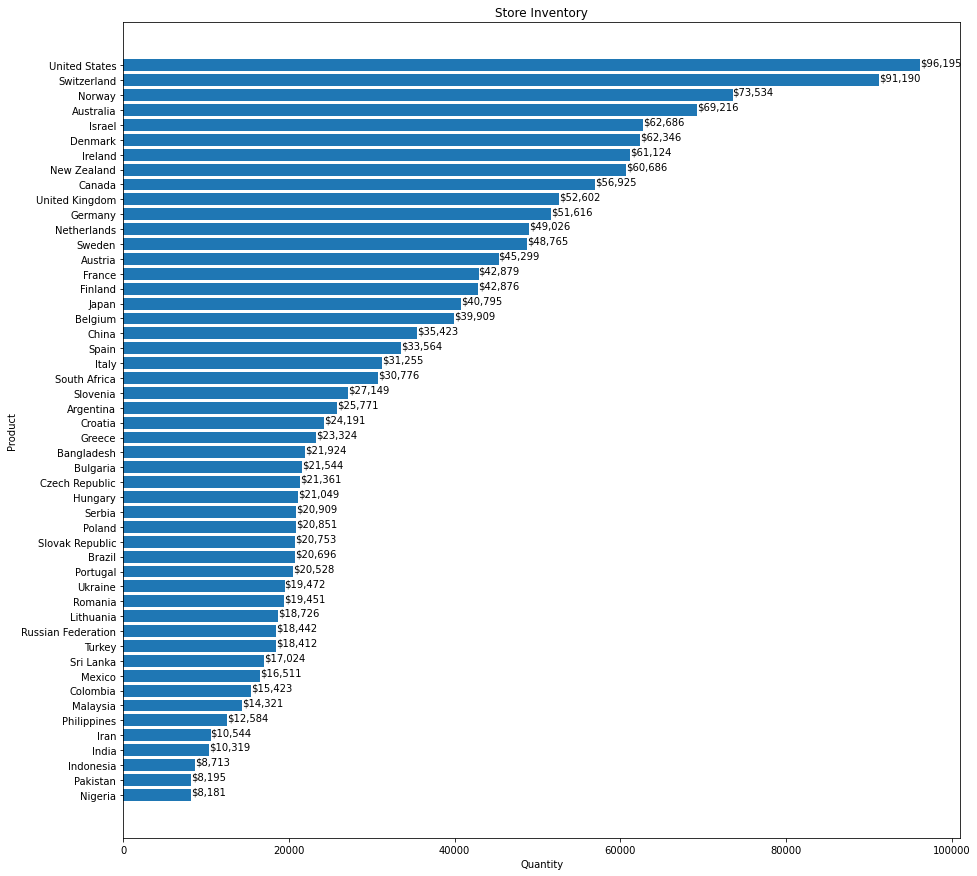

In [143]:
country = aggregated_data['Country']
salary =  aggregated_data['SalaryPerPerson']

plt.figure(figsize=(15,15))
plt.barh(country,salary)
plt.title('Store Inventory')
plt.ylabel('Product')
plt.xlabel('Quantity')

for index, value in enumerate(salary):
    value = round(value)
    currency = "${:,}".format(value)
    plt.text(value, index, str(currency))
plt.show()


This data shows us the developped countries giving much more salary to the their workers. This is expected. Because the developing or the underdeveleopped countries can not afford the exchange rate in terms of US dollar. Lets examine a spesific example, Nigeria. They are the 6th satisfied workes but they are least earning country. This Brings another question to the minds. 

In [182]:
top_50_country = list(developers['Country'].value_counts().head(50).index)

filtered_developers = developers[developers['Country'].isin(top_50_country)]

filtered_developers.MajorUndergrad.unique()
computer_related = ['Computer science or software engineering',
                    'Computer engineering or electrical/electronics engineering',
                    'Computer programming or Web development',
                    'Information technology, networking, or system administration',
                   ]
no_education = 'I never declared a major';
        

filtered_developers['MajorType'] = filtered_developers.apply(lambda x: 'Computer Science' if x['MajorUndergrad'] in computer_related else('No Degree' if x['MajorUndergrad'] == no_education else 'non-Computer Science'),axis=1)


total_respondents_per_country = filtered_developers['Country'].value_counts()
aggregated_data = filtered_developers.groupby(['Country','MajorType'], as_index=False)['Respondent'].count()
aggregated_data
aggregated_data['MajorPercentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

# Pivot the data
aggregated_data = aggregated_data[['Country', 'MajorType', 'MajorPercentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='MajorPercentage', index='Country', columns='MajorType')
pivoted_data = pivoted_data.fillna(0)
pivoted_data = pivoted_data.reindex(pivoted_data.sort_values(by='Computer Science', ascending=False).index)
pivoted_data


<ipython-input-182-8d0340ec52e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_developers['MajorType'] = filtered_developers.apply(lambda x: 'Computer Science' if x['MajorUndergrad'] in computer_related else('No Degree' if x['MajorUndergrad'] == no_education else 'non-Computer Science'),axis=1)


MajorType,Computer Science,No Degree,non-Computer Science
Country,,,
Pakistan,0.919,0.007,0.075
India,0.876,0.005,0.120
Sri Lanka,0.866,0.017,0.118
Mexico,0.857,0.008,0.135
Colombia,0.852,0.008,0.139
Philippines,0.851,0.021,0.129
Bangladesh,0.819,0.009,0.172
Portugal,0.794,0.006,0.200
Malaysia,0.793,0.009,0.198


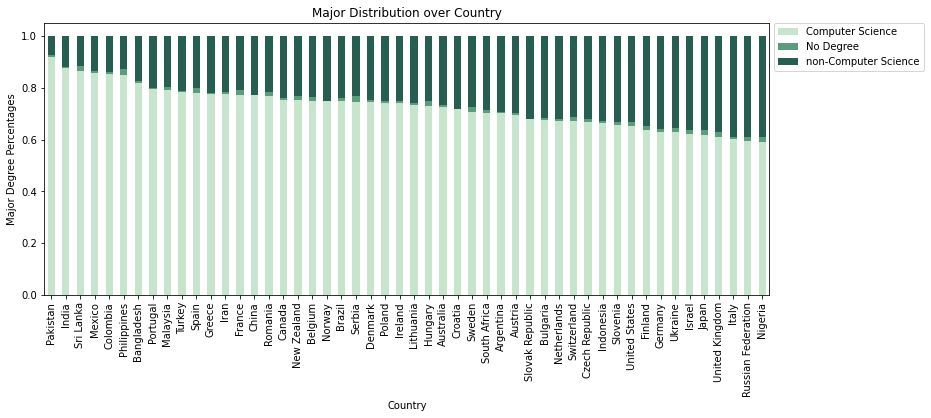

In [184]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Major Degree Percentages')
plt.title('Major Distribution over Country')
plt.show()

We can see that developing and underdevelopped countries hiring computer science based people. This may happen because of teh following , there might be less oppurtunity on those countries, no other people from outside the computer science area hired by the companies

## Conlusion
1. Majority of the top job satisfaction coming from the developing or under developped countries. Which is normal from my perspective. Income level is hogher than the any other job on those countries.
2. But these developing countries can not afford high level salary to their employees because of the exchange rate in terms of US dollar.
3. When we check the education distribution we are seeing that, developped countries are more willing to hire people outside of the computer science.